In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading data into dataframe

df = pd.read_csv("C:\\Users\\ADMIN\\Downloads\\Datasets\\FuelConsumption.csv")

In [3]:
#Let's have a quick look
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


## Q1. Create a scatter plot between CYLINDERS vs CO2EMISSIONS

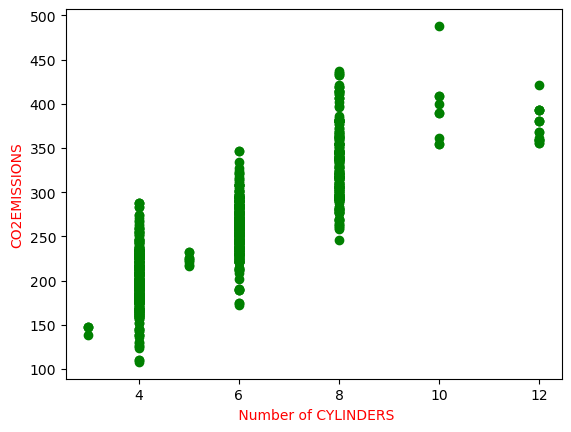

In [5]:
plt.scatter(df.CYLINDERS, df.CO2EMISSIONS, color='green')
plt.xlabel(" Number of CYLINDERS", color='red')
plt.ylabel("CO2EMISSIONS", color='red')
plt.show()

## Q2 : using scatter plot compare data cylinder vs Co2Emission and Enginesize Vs Co2Emission using different colors.


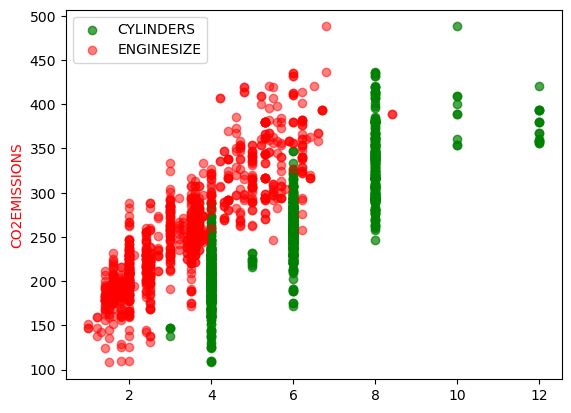

In [6]:
plt.scatter(df.CYLINDERS, df.CO2EMISSIONS, color='green', alpha=0.7, label='CYLINDERS')
plt.legend()

plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS, color='red', alpha=0.5, label='ENGINESIZE')
plt.legend()

plt.ylabel("CO2EMISSIONS", color='red')
plt.show()

##  Q3 : using scatter plot compare data cylinder vs Co2Emission and Enginesize Vs Co2Emission and FuelConsumption_comb vs Co2Emission using different colors.


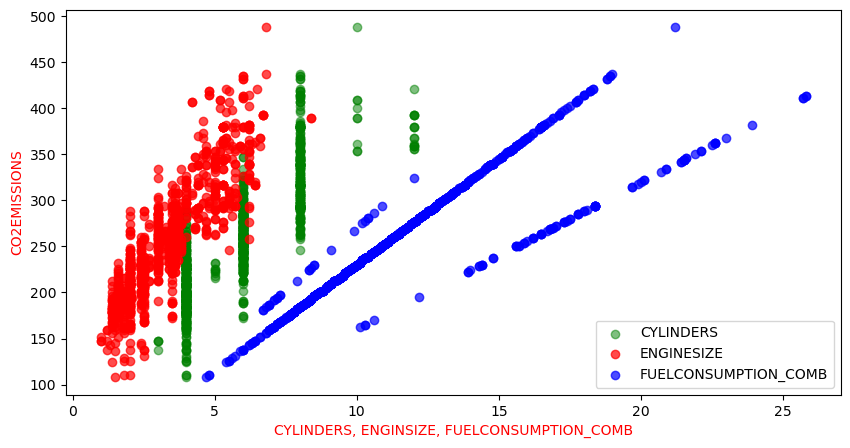

In [7]:
plt.figure(figsize= (10,5))
plt.scatter(df.CYLINDERS, df.CO2EMISSIONS, color='green', alpha=0.5, label='CYLINDERS')
plt.legend()

plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS, color='red', alpha=0.7, label='ENGINESIZE')
plt.legend()

plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS, color='blue', alpha=0.7, label='FUELCONSUMPTION_COMB')
plt.legend()

plt.xlabel("CYLINDERS, ENGINSIZE, FUELCONSUMPTION_COMB", color='red')
plt.ylabel("CO2EMISSIONS", color='red')
plt.show()

## Q4 : train your model with indepedent variable as cylinder and dependent variable as Co2Emission 

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df[["CYLINDERS"]].values   # INDEPENDENT VARIABLE
y = df[["CO2EMISSIONS"]].values # DEPENDENT VARIABLE

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [11]:
# printing the train and test shape

print("Training Stats: ", X_train.shape, y_train.shape )
print("Testing Stats: ", X_test.shape, y_test.shape )

Training Stats:  (853, 1) (853, 1)
Testing Stats:  (214, 1) (214, 1)


In [12]:
# Let's import the linear regression from sklearn
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [13]:
# Now train model by using fit method
reg.fit(X_train, y_train)

LinearRegression()

In [14]:
#printing the coeficient and slope
print("Coeficient--> ",reg.coef_[0][0])
print("Intercept--> ", reg.intercept_[0])

Coeficient-->  30.242755294099172
Intercept-->  81.40750767819836


In [15]:
# predicted output of trained model saved in y_hat
y_hat = reg.predict(X_test)


In [16]:
# now calculating the error and accuracy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [17]:
print("mean_squared_error :: ", mean_squared_error(y_test, y_hat))
print("r2_score :: ", r2_score(y_test, y_hat)*100, "%")

mean_squared_error ::  1120.2587897648748
r2_score ::  72.39362200047776 %


#### By using CYLINDERS as independent variable and training model with simple regressionon , we got accuracy=72.39%

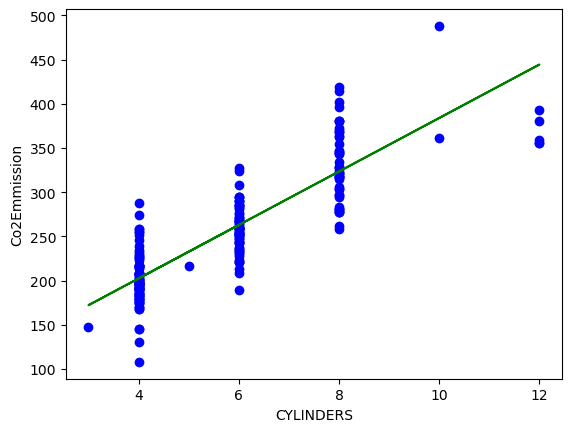

In [18]:
# plotting predicted data
plt.scatter(X_test, y_test, color="blue")
plt.plot(X_test, reg.coef_[0][0]*X_test + reg.intercept_[0], color="green" )
plt.xlabel("CYLINDERS")
plt.ylabel("Co2Emmission")
plt.show()

## Q5 : Train another model with independent variable as FuelConsumption_comb and dependent variable as Co2Emission

In [19]:
X1 = df[["FUELCONSUMPTION_COMB"]].values # Independent variable
y1 = df[["CO2EMISSIONS"]].values         # Dependent variable


In [20]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=30)

In [21]:
# printing the train and test shape

print("Training Stats: ", X1_train.shape, y1_train.shape )
print("Testing Stats: ", X1_test.shape, y1_test.shape )

Training Stats:  (853, 1) (853, 1)
Testing Stats:  (214, 1) (214, 1)


In [22]:
# Let's import the linear regression from sklearn
from sklearn import linear_model
regg = linear_model.LinearRegression()


In [23]:
# Now train model by using fit method
regg.fit(X1_train, y1_train)

LinearRegression()

In [24]:
#printing the coeficient and slope
print("Coeficient--> ",regg.coef_[0][0])
print("Intercept--> ", regg.intercept_[0])

Coeficient-->  16.278610101157128
Intercept-->  67.82087310071174


In [25]:
# predicted output of trained model saved in y_hat
y1_hat = regg.predict(X1_test)


In [26]:
# now calculating the error and accuracy

print("mean_squared_error :: ", mean_squared_error(y1_test, y1_hat))
print("r2_score :: ", r2_score(y1_test, y1_hat)*100, "%")

mean_squared_error ::  810.852038281886
r2_score ::  80.01828856420666 %


#### By using FUELCONSUMPTION_COMB as independent variable and training model with simple regression, we got accuracy=80%

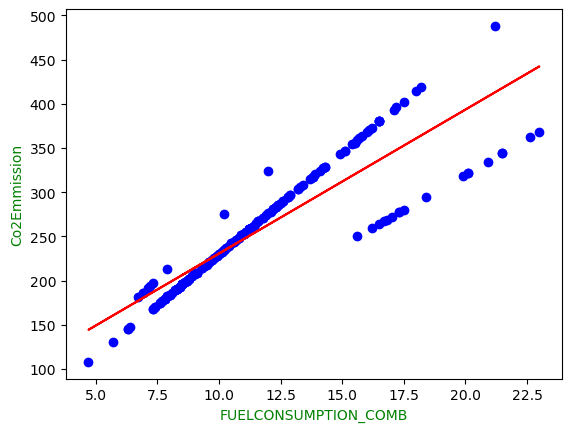

In [27]:
# plotting predicted data
plt.scatter(X1_test,y1_test, color="blue")
plt.plot(X1_test, regg.coef_[0][0]*X1_test + regg.intercept_[0], color="red" )
plt.xlabel("FUELCONSUMPTION_COMB", color='green')
plt.ylabel("Co2Emmission", color='green')
plt.show()

## Q6 : Train your model on different train test ratio and train the models and note down there accuracies

###  setting train:test ratio as 70:30

In [28]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=30)

In [29]:
# printing the train and test shape

print("Training Stats: ", X1_train.shape, y1_train.shape )
print("Testing Stats: ", X1_test.shape, y1_test.shape )

Training Stats:  (746, 1) (746, 1)
Testing Stats:  (321, 1) (321, 1)


In [30]:
# Now train model by using fit method
regg.fit(X1_train, y1_train)

LinearRegression()

In [31]:
# predicted output of trained model saved in y_hat
y1_hat = regg.predict(X1_test)


In [32]:
# now calculating the error and accuracy

print("mean_squared_error :: ", mean_squared_error(y1_test, y1_hat))
print("r2_score :: ", r2_score(y1_test, y1_hat)*100, "%")

mean_squared_error ::  815.5212028359324
r2_score ::  80.47490010050623 %


### Now setting train:test ratio as 90:10

In [33]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.1, random_state=30)

In [34]:
# printing the train and test shape

print("Training Stats: ", X1_train.shape, y1_train.shape )
print("Testing Stats: ", X1_test.shape, y1_test.shape )

Training Stats:  (960, 1) (960, 1)
Testing Stats:  (107, 1) (107, 1)


In [35]:
# Now train model by using fit method
regg.fit(X1_train, y1_train)

LinearRegression()

In [36]:
# predicted output of trained model saved in y_hat
y1_hat = regg.predict(X1_test)


In [37]:
# now calculating the error and accuracy

print("mean_squared_error :: ", mean_squared_error(y1_test, y1_hat))
print("r2_score :: ", r2_score(y1_test, y1_hat)*100, "%")

mean_squared_error ::  829.0696217617915
r2_score ::  78.34895124100339 %


### by using train:test ratio as 70:30 we got accuracy 80.47%
### by using train:test ratio as 80:20 we got accuracy 80.01%
### by using train:test ratio as 90:10 we got accuracy=78.34%

## Q7 : we are providing you another dataset regarding housing prediction to need to apply Linear Regression on atleast 5 pairs of independent and dependent variable and store their accuracy and then make a plot of those accuracy

In [38]:
# Loading the housing dataset
df = pd.read_csv("C:\\Users\\ADMIN\\Downloads\\Datasets\\houseRegressionStudents.csv")

In [39]:
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [40]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [41]:
# checking whether there is any null values in the dataset or not
df.isnull().sum() 

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 62, dtype: int64

## Dataset has no null values so, there is no need of null values handling.

In [42]:
df1 = df.drop("Id", axis=1)  # Here we dropped ID column as it has no effect on DV

In [43]:
# Getting independent and dependent variable

IV = df1.drop("SalePrice", axis=1)  # IV contains all independent variables
DV = df[["SalePrice"]]   # DV is dependent variable

In [44]:
# Getting only those IV having datatype integer 

int_data = IV.select_dtypes(include=['int64'])
int_data.info()  # Now we have 33 integer type IV 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1460 non-null   int64
 1   LotArea        1460 non-null   int64
 2   OverallQual    1460 non-null   int64
 3   OverallCond    1460 non-null   int64
 4   YearBuilt      1460 non-null   int64
 5   YearRemodAdd   1460 non-null   int64
 6   BsmtFinSF1     1460 non-null   int64
 7   BsmtFinSF2     1460 non-null   int64
 8   BsmtUnfSF      1460 non-null   int64
 9   TotalBsmtSF    1460 non-null   int64
 10  1stFlrSF       1460 non-null   int64
 11  2ndFlrSF       1460 non-null   int64
 12  LowQualFinSF   1460 non-null   int64
 13  GrLivArea      1460 non-null   int64
 14  BsmtFullBath   1460 non-null   int64
 15  BsmtHalfBath   1460 non-null   int64
 16  FullBath       1460 non-null   int64
 17  HalfBath       1460 non-null   int64
 18  BedroomAbvGr   1460 non-null   int64
 19  Kitche

## Mutual Information Regression

### By performing Mutual Information Regression we will get most significant features with respect to DV.

In [45]:
int_data.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [46]:
# Storing column names of all integer IV
ivnames = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']

In [47]:
# converting IV and DV into array

int_data1 = int_data.values
DV1 = DV.values

In [48]:
# Importing mutual information regression from sklearn
from sklearn.feature_selection import mutual_info_regression
MIR = mutual_info_regression(int_data1, DV1)
MIR

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.05690085, 0.09730313, 0.52920792, 0.09412273, 0.2660547 ,
       0.20615758, 0.12638359, 0.01252151, 0.06197449, 0.25585769,
       0.23946789, 0.09590559, 0.00068232, 0.37941917, 0.01984577,
       0.01501282, 0.2539545 , 0.08377888, 0.07590858, 0.03983263,
       0.18321279, 0.18422553, 0.36401599, 0.28147011, 0.04815221,
       0.06179164, 0.02114816, 0.        , 0.0160937 , 0.        ,
       0.00336775, 0.        , 0.01548994])

In [49]:
# converting array into series
MIR_Ser = pd.Series(MIR)

In [50]:
# Getting MIR series with respect to column names

MIR_Ser.index = ivnames
MIR_Ser

MSSubClass       0.056901
LotArea          0.097303
OverallQual      0.529208
OverallCond      0.094123
YearBuilt        0.266055
YearRemodAdd     0.206158
BsmtFinSF1       0.126384
BsmtFinSF2       0.012522
BsmtUnfSF        0.061974
TotalBsmtSF      0.255858
1stFlrSF         0.239468
2ndFlrSF         0.095906
LowQualFinSF     0.000682
GrLivArea        0.379419
BsmtFullBath     0.019846
BsmtHalfBath     0.015013
FullBath         0.253954
HalfBath         0.083779
BedroomAbvGr     0.075909
KitchenAbvGr     0.039833
TotRmsAbvGrd     0.183213
Fireplaces       0.184226
GarageCars       0.364016
GarageArea       0.281470
WoodDeckSF       0.048152
OpenPorchSF      0.061792
EnclosedPorch    0.021148
3SsnPorch        0.000000
ScreenPorch      0.016094
PoolArea         0.000000
MiscVal          0.003368
MoSold           0.000000
YrSold           0.015490
dtype: float64

In [51]:
significant_feat = MIR_Ser.sort_values(ascending = False)
significant_feat

OverallQual      0.529208
GrLivArea        0.379419
GarageCars       0.364016
GarageArea       0.281470
YearBuilt        0.266055
TotalBsmtSF      0.255858
FullBath         0.253954
1stFlrSF         0.239468
YearRemodAdd     0.206158
Fireplaces       0.184226
TotRmsAbvGrd     0.183213
BsmtFinSF1       0.126384
LotArea          0.097303
2ndFlrSF         0.095906
OverallCond      0.094123
HalfBath         0.083779
BedroomAbvGr     0.075909
BsmtUnfSF        0.061974
OpenPorchSF      0.061792
MSSubClass       0.056901
WoodDeckSF       0.048152
KitchenAbvGr     0.039833
EnclosedPorch    0.021148
BsmtFullBath     0.019846
ScreenPorch      0.016094
YrSold           0.015490
BsmtHalfBath     0.015013
BsmtFinSF2       0.012522
MiscVal          0.003368
LowQualFinSF     0.000682
3SsnPorch        0.000000
PoolArea         0.000000
MoSold           0.000000
dtype: float64

In [52]:
# Getting all the removable columns which are least significant
removable_col = []
for i in MIR_Ser.index:
    if MIR_Ser[i] < 0.25:
        removable_col.append(i)
        
removable_col = pd.Series(removable_col)
print(f"Removable columns are:: \n {removable_col}")
        

Removable columns are:: 
 0        MSSubClass
1           LotArea
2       OverallCond
3      YearRemodAdd
4        BsmtFinSF1
5        BsmtFinSF2
6         BsmtUnfSF
7          1stFlrSF
8          2ndFlrSF
9      LowQualFinSF
10     BsmtFullBath
11     BsmtHalfBath
12         HalfBath
13     BedroomAbvGr
14     KitchenAbvGr
15     TotRmsAbvGrd
16       Fireplaces
17       WoodDeckSF
18      OpenPorchSF
19    EnclosedPorch
20        3SsnPorch
21      ScreenPorch
22         PoolArea
23          MiscVal
24           MoSold
25           YrSold
dtype: object


In [53]:
final_IV = int_data.drop(removable_col, axis=1)  # we dropped all least significant columns and got final IV

In [54]:
final_IV.columns

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath',
       'GarageCars', 'GarageArea'],
      dtype='object')

## Applying simple Regression on each Iv and analysing accuracy

## 1. IV = OverallQual

In [55]:
x1= final_IV[["OverallQual"]].values
y = DV.values

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=130)

In [58]:
from sklearn import linear_model
reg1 = linear_model.LinearRegression()

In [59]:
reg1.fit(x1_train,y_train)

LinearRegression()

In [60]:
# coeficient and intercept

print(reg1.coef_[0][0])
print(reg1.intercept_[0])

46197.76362382294
-100127.861489384


In [61]:
#predicted output
y_pred = reg1.predict(x1_test)

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [63]:
print("mean_squared_error:: ", mean_squared_error(y_test,y_pred))
print("r2_score:: ", r2_score(y_test,y_pred)*100, "%")

mean_squared_error::  1970898412.4957097
r2_score::  60.34071490879334 %


In [64]:
# storing accuracy
OverallQual_acc = round(r2_score(y_test,y_pred)*100, 2)
print(f"OverallQual_acc ==> {OverallQual_acc} % ")

OverallQual_acc ==> 60.34 % 


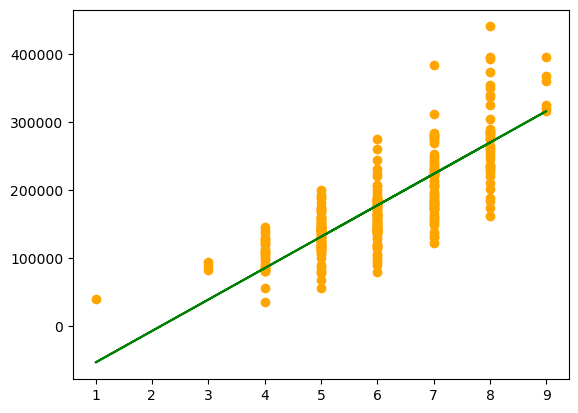

In [65]:
# predicted graph
plt.scatter(x1_test, y_test, color = "orange")
plt.plot(x1_test,reg1.coef_[0][0]*x1_test + reg1.intercept_[0], color = 'green' )
plt.show()

## 2. IV=GrLivArea

In [66]:
x2= final_IV[["GrLivArea"]].values
y = DV.values

In [67]:
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=130)

In [68]:
reg2 = linear_model.LinearRegression()

In [69]:
reg2.fit(x2_train,y_train)

LinearRegression()

In [70]:
# coeficient and intercept

print(reg2.coef_[0][0])
print(reg2.intercept_[0])

109.65203642614301
15416.502761415148


In [71]:
#predicted output
y_pred1 = reg2.predict(x2_test)

In [72]:
print("mean_squared_error:: ", mean_squared_error(y_test,y_pred1))
print("r2_score:: ", r2_score(y_test,y_pred1)*100, "%")

mean_squared_error::  2756018568.862354
r2_score::  44.542181653713506 %


In [73]:
# Storing accuracy
GrLivArea_acc = round(r2_score(y_test,y_pred1)*100,2)
print(f"GrLivArea_acc ==> {GrLivArea_acc} % ")

GrLivArea_acc ==> 44.54 % 


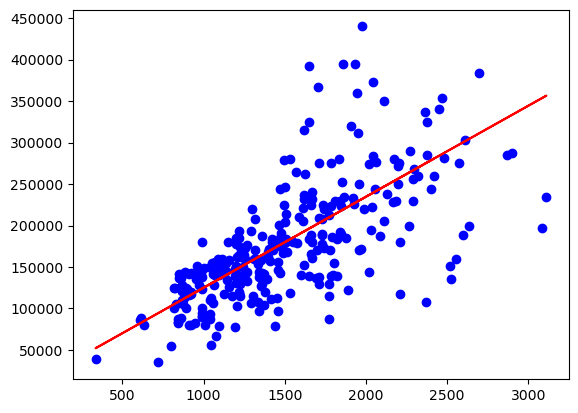

In [74]:
# predicted graph
plt.scatter(x2_test, y_test, color = "blue")
plt.plot(x2_test,reg2.coef_[0][0]*x2_test + reg2.intercept_[0], color = 'red' )
plt.show()

## 3. IV=TotalBsmtSF

In [75]:
x3= final_IV[["TotalBsmtSF"]].values
y = DV.values

In [76]:
x3_train, x3_test, y_train, y_test = train_test_split(x3, y, test_size=0.2, random_state=130)

In [77]:
reg3 = linear_model.LinearRegression()

In [78]:
reg3.fit(x3_train,y_train)

LinearRegression()

In [79]:
# coeficient and intercept

print(reg3.coef_[0][0])
print(reg3.intercept_[0])

111.72524118426533
61942.721838286525


In [80]:
#predicted output
y_pred2 = reg3.predict(x3_test)

In [81]:
print("mean_squared_error:: ", mean_squared_error(y_test,y_pred2))
print("r2_score:: ", r2_score(y_test,y_pred2)*100, "%")

mean_squared_error::  2926974794.371075
r2_score::  41.102125259847114 %


In [82]:
# Storing accuracy
TotalBsmtSF_acc =  round(r2_score(y_test,y_pred2)*100, 2)
print(f"TotalBsmtSF_acc ==> {TotalBsmtSF_acc} % ")

TotalBsmtSF_acc ==> 41.1 % 


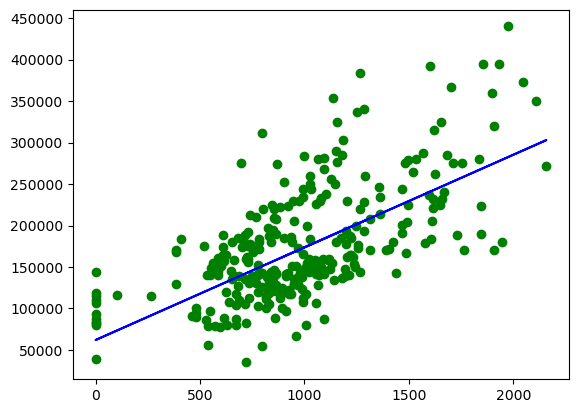

In [83]:
# predicted graph
plt.scatter(x3_test, y_test, color = "green")
plt.plot(x3_test,reg3.coef_[0][0]*x3_test + reg3.intercept_[0], color = 'blue' )
plt.show()

## 4. IV=GarageCars

In [84]:
x4= final_IV[["GarageCars"]].values
y = DV.values

In [85]:
x4_train, x4_test, y_train, y_test = train_test_split(x4, y, test_size=0.2, random_state=130)

In [86]:
reg4 = linear_model.LinearRegression()

In [87]:
reg4.fit(x4_train,y_train)

LinearRegression()

In [88]:
# coeficient and intercept

print(reg4.coef_[0][0])
print(reg4.intercept_[0])

69792.17521044644
58969.371482251605


In [89]:
#predicted output
y_pred3 = reg4.predict(x4_test)

In [90]:
print("mean_squared_error:: ", mean_squared_error(y_test,y_pred3))
print("r2_score:: ", r2_score(y_test,y_pred3)*100, "%")

mean_squared_error::  2763543795.005081
r2_score::  44.390755742018605 %


In [91]:
# Storing accuracy
GarageCars_acc = round(r2_score(y_test,y_pred3)*100,2)
print(f"GarageCars_acc ==> {GarageCars_acc} % ")

GarageCars_acc ==> 44.39 % 


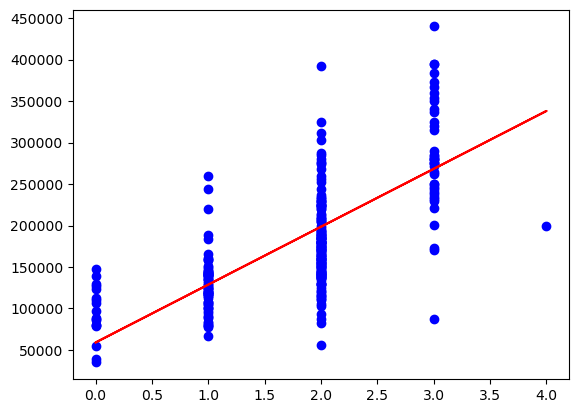

In [92]:
# predicted graph
plt.scatter(x4_test, y_test, color = "blue")
plt.plot(x4_test,reg4.coef_[0][0]*x4_test + reg4.intercept_[0], color = 'red' )
plt.show()

## 5. IV=GarageArea

In [93]:
x5= final_IV[["GarageArea"]].values
y = DV.values

In [94]:
x5_train, x5_test, y_train, y_test = train_test_split(x5, y, test_size=0.2, random_state=130)

In [95]:
reg5 = linear_model.LinearRegression()

In [96]:
reg5.fit(x5_train,y_train)

LinearRegression()

In [97]:
# coeficient and intercept

print(reg5.coef_[0][0])
print(reg5.intercept_[0])

233.394324695545
71541.73564557459


In [98]:
#predicted output
y_pred4 = reg5.predict(x5_test)

In [99]:
print("mean_squared_error:: ", mean_squared_error(y_test,y_pred4))
print("r2_score:: ", r2_score(y_test,y_pred4)*100, "%")

mean_squared_error::  2643950486.710976
r2_score::  46.79726491497518 %


In [100]:
# Storing accuracy
GarageArea_acc = round(r2_score(y_test,y_pred4)*100,2)
print(f"GarageArea_acc ==> {GarageArea_acc}%")

GarageArea_acc ==> 46.8%


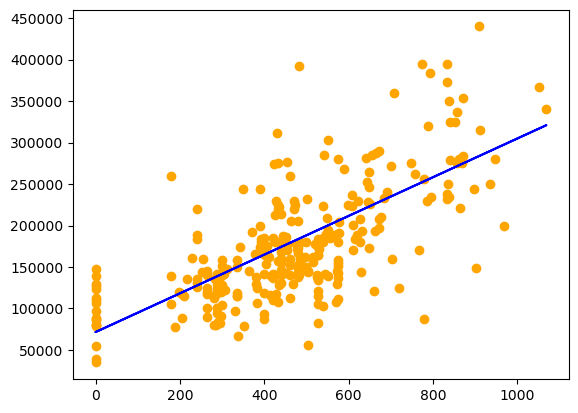

In [101]:
# predicted graph
plt.scatter(x5_test, y_test, color = "orange")
plt.plot(x5_test,reg5.coef_[0][0]*x5_test + reg5.intercept_[0], color = 'blue' )
plt.show()

## Plotting Accuracy plot using Bar graph

In [104]:
# Making list of all IV's accuracy and IV's names.

Accuracy_list = [OverallQual_acc, GrLivArea_acc, TotalBsmtSF_acc, GarageCars_acc,  GarageArea_acc]
Iv_names = ["OverallQual", "GrLivArea", "TotalBsmtSF", "GarageCars", "GarageArea"]

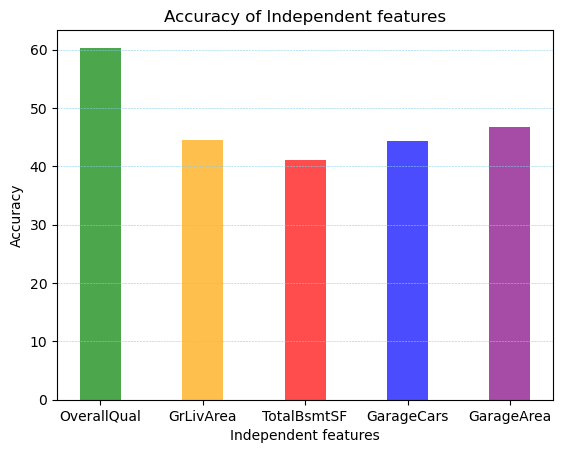

In [103]:
# creating the bar plot

plt.bar(Iv_names, Accuracy_list, color =['green', 'orange', 'red', 'blue', 'purple'] , alpha = 0.7,  width = 0.4)
plt.xlabel("Independent features")
plt.ylabel("Accuracy")
plt.title("Accuracy of Independent features")
plt.grid(axis = 'y', color = 'skyblue', linestyle = '--', linewidth = 0.4)

plt.show()

